# Electron diffraction simulation computation tutorial

_This is a step-by-step tutorial walking you through the numeric simulation, requiring minimal domain knowledge._


### Electron wavelength

Accelerated by a votage of $E_0$, the electron wavelength in vacuum is given by
$$
\lambda_0 = \frac{12.3984244}{\sqrt{E_0 (E_0+1021.99812)}}
$$

That is to say, if the acceleration voltage is $120$ KeV, then the wave length is about $0.03349$ Å ($1.0 \times 10^{-10}$ m).

The electrons traveling through the specimen have a bit higher energy, but we ignore their impact in our calculation.

In [1]:
import math
E_0 = 120 # in keV
lambda_0 = 12.3984244/math.sqrt(E_0*(E_0+1021.99812)) # in Å
print( f'With an acceleration voltage of {E_0} KeV, the coresponding electron wave length is {lambda_0} ångström.' )

With an acceleration voltage of 120 KeV, the coresponding electron wave length is 0.03349216180963567 ångström.


### Select reflections

We simulate the diffraction patterns of SrTiO3, thickness 40 nm, maximum tilt angle 40 mrad and orientation $(0, 0, 1)$, with an acceleration voltage of 120 KeV. The indexed diffraction discs (121 reflections) are demonstrated below

----

![srtio3](./images/SrTiO3_40_40.png)

----





The diffraction image above shows 121 diffraction discs, most of which are weak and only 21 of them are visually strong.
For ease of demonstration, we simulate the diffraction pattern only with 5 discs coresponding to reflections  $(\bar{1}, 1, 0)$, $(1, 1, 0)$, $(0, 0, 0)$, $(\bar{1}, \bar{1}, 0)$ and $(1, \bar{1}, 0)$. But it is easy to expand to arbitrary beam numbers.

### Structure matrix

We first constuct the structure factor matrix $\mathcal{A}$. 

We put the corresponding structure factors in the central column of the structure factor matrix $\mathcal{A}$, as we only select 5 reflections, this matrix is a $5 \times 5$ squared complex matrix:
    
$$\mathcal{A} = \begin{bmatrix}
 ? & ? & \mathbf{u}_{(\bar{1}, 1, 0)} & ? & ? \\
 ? & ? & \mathbf{u}_{(1, 1, 0)} & ? & ? \\
 ? & ? & 0 & ? & ? \\
 ? & ? & \mathbf{u}_{(\bar{1}, \bar{1}, 0)} & ? & ? \\
  ? & ? & \mathbf{u}_{(1, \bar{1}, 0)} & ? & ? \\
\end{bmatrix}$$    
    
Please note that the mean inner potential $U_{(0, 0, 0)}$ is ommitted, as it serves as a pure phase factor to all reflections. 



    

We continue to construct the structure factor matrix $\mathcal{A}$, we set the rest diagonal elements to be $2\,k_t \, s_{(\bar{1}, 1, 0)}$, $2\,k_t \, s_{(1, 1, 0)}$, $2\,k_t \, s_{(\bar{1}, \bar{1}, 0)}$ and $2\,k_t \, s_{(1, \bar{1}, 0)}$. And we will discuss how to calculate these values later.

$$\mathcal{A} = \begin{bmatrix}
 2\,k_t \, s_{(\bar{1}, 1, 0)} & ? & \mathbf{u}_{(\bar{1}, 1, 0)} & ? & ? \\
 ? & 2\,k_t \, s_{(1, 1, 0)} & \mathbf{u}_{(1, 1, 0)} & ? & ? \\
 ? & ? & 0 & ? & ? \\
 ? & ? & \mathbf{u}_{(\bar{1}, \bar{1}, 0)} & 2\,s_t \, s_{(\bar{1}, \bar{1}, 0)} & ? \\
  ? & ? & \mathbf{u}_{(1, \bar{1}, 0)} & ? & 2\,k_t \, s_{(1, \bar{1}, 0)} \\
\end{bmatrix}$$    
    
Please note, the subscriptions of $s$ are identical to the reflections in the central column.

 






We determine $\mathcal{A}[0][1]$ to be $\mathbf{u}_{(\bar{2}, 0, 0)}$, as $(\bar{1}, 1, 0) - (1, 1, 0) = (\bar{2}, 0, 0)$

$$\mathcal{A} = \begin{bmatrix}
 2\,k_t \, s_{(\bar{1}, 1, 0)} & \underline{\mathbf{u}_{(\bar{2}, 0, 0)}} & \boxed{ \mathbf{u}_{(\bar{1}, 1, 0)} } & ? & ? \\
 ? & 2\,k_t \, s_{(1, 1, 0)} & \boxed{ \mathbf{u}_{(1, 1, 0)} } & ? & ? \\
 ? & ? & 0 & ? & ? \\
 ? & ? & \mathbf{u}_{(\bar{1}, \bar{1}, 0)} & 2\,s_t \, s_{(\bar{1}, \bar{1}, 0)} & ? \\
  ? & ? & \mathbf{u}_{(1, \bar{1}, 0)} & ? & 2\,k_t \, s_{(1, \bar{1}, 0)} \\
\end{bmatrix}$$  

Please note the boxed positions where the reflections are selected to calcuate.




We determine $\mathcal{A}[0][3]$ to be $\mathbf{u}_{(0, \bar{2}, 0)}$, as $(\bar{1}, 1, 0) - (\bar{1}, \bar{1}, 0) = (0, \bar{2},  0)$

$$\mathcal{A} = \begin{bmatrix}
 2\,k_t \, s_{(\bar{1}, 1, 0)} & \mathbf{u}_{(\bar{2}, 0, 0)} & \boxed{ \mathbf{u}_{(\bar{1}, 1, 0)} } & \underline{\mathbf{u}_{(0, \bar{2}, 0)}} & ? \\
 ? & 2\,k_t \, s_{(1, 1, 0)} & \mathbf{u}_{(1, 1, 0)} & ? & ? \\
 ? & ? & 0 & ? & ? \\
 ? & ? & \boxed{ \mathbf{u}_{(\bar{1}, \bar{1}, 0)} } & 2\,s_t \, s_{(\bar{1}, \bar{1}, 0)} & ? \\
  ? & ? & \mathbf{u}_{(1, \bar{1}, 0)} & ? & 2\,k_t \, s_{(1, \bar{1}, 0)} \\
\end{bmatrix}$$  


We determine $\mathcal{A}[0][4]$ to be $\mathbf{u}_{(\bar{2}, 2, 0)}$, as $(\bar{1}, 1, 0) - (1, \bar{1}, 0) = (\bar{2}, 2, 0)$

$$\mathcal{A} = \begin{bmatrix}
 2\,k_t \, s_{(\bar{1}, 1, 0)} & \mathbf{u}_{(\bar{2}, 0, 0)} & \boxed{ \mathbf{u}_{(\bar{1}, 1, 0)} } & \mathbf{u}_{(0, \bar{2}, 0)} & \underline{\mathbf{u}_{(\bar{2}, 2, 0)}} \\
 ? & 2\,k_t \, s_{(1, 1, 0)} & \mathbf{u}_{(1, 1, 0)} & ? & ? \\
 ? & ? & 0 & ? & ? \\
 ? & ? & \mathbf{u}_{(\bar{1}, \bar{1}, 0)}  & 2\,s_t \, s_{(\bar{1}, \bar{1}, 0)} & ? \\
  ? & ? & \boxed{ \mathbf{u}_{(1, \bar{1}, 0)} } & ? & 2\,k_t \, s_{(1, \bar{1}, 0)} \\
\end{bmatrix}$$  


We determine $\mathcal{A}[1][0]$ to be $\mathbf{u}_{(2, 0, 0)}$, as $(1, 1, 0) - (\bar{1}, 1, 0) = ( 2, 0, 0)$

$$\mathcal{A} = \begin{bmatrix}
 2\,k_t \, s_{(\bar{1}, 1, 0)} & \mathbf{u}_{(\bar{2}, 0, 0)} & \boxed{ \mathbf{u}_{(\bar{1}, 1, 0)} } & \mathbf{u}_{(0, \bar{2}, 0)} & \mathbf{u}_{(\bar{2}, 2, 0)} \\
 \underline{\mathbf{u}_{(2, 0, 0)}} & 2\,k_t \, s_{(1, 1, 0)} & \boxed{ \mathbf{u}_{(1, 1, 0)} } & ? & ? \\
 ? & ? & 0 & ? & ? \\
 ? & ? & \mathbf{u}_{(\bar{1}, \bar{1}, 0)}  & 2\,s_t \, s_{(\bar{1}, \bar{1}, 0)} & ? \\
  ? & ? & \mathbf{u}_{(1, \bar{1}, 0)} & ? & 2\,k_t \, s_{(1, \bar{1}, 0)} \\
\end{bmatrix}$$  


We determine $\mathcal{A}[1][3]$ to be $\mathbf{u}_{(2, 2, 0)}$, as $(1, 1, 0) - (\bar{1}, \bar{1}, 0) = ( 2, 2, 0)$

$$\mathcal{A} = \begin{bmatrix}
 2\,k_t \, s_{(\bar{1}, 1, 0)} & \mathbf{u}_{(\bar{2}, 0, 0)} & \mathbf{u}_{(\bar{1}, 1, 0)} & \mathbf{u}_{(0, \bar{2}, 0)} & \mathbf{u}_{(\bar{2}, 2, 0)} \\
\mathbf{u}_{(2, 0, 0)} & 2\,k_t \, s_{(1, 1, 0)} & \boxed{ \mathbf{u}_{(1, 1, 0)} } & \underline{ \mathbf{u}_{(\bar{2}, \bar{2}, 0)}} & ? \\
 ? & ? & 0 & ? & ? \\
 ? & ? & \boxed{ \mathbf{u}_{(\bar{1}, \bar{1}, 0)} } & 2\,s_t \, s_{(\bar{1}, \bar{1}, 0)} & ? \\
  ? & ? & \mathbf{u}_{(1, \bar{1}, 0)} & ? & 2\,k_t \, s_{(1, \bar{1}, 0)} \\
\end{bmatrix}$$  


We finally determine all elements in the structure matrix $\mathcal{A}$:

$$\mathcal{A} = \begin{bmatrix}
 2\,k_t \, s_{(\bar{1}, 1, 0)} & \mathbf{u}_{(\bar{2}, 0, 0)} & \mathbf{u}_{(\bar{1}, 1, 0)} & \mathbf{u}_{(0, \bar{2}, 0)} & \mathbf{u}_{(\bar{2}, 2, 0)} \\
\mathbf{u}_{(2, 0, 0)} & 2\,k_t \, s_{(1, 1, 0)} & \mathbf{u}_{(1, 1, 0) } & \mathbf{u}_{(\bar{2}, \bar{2}, 0)} & \mathbf{u}_{(0, 2, 0)} \\
 \mathbf{u}_{(1, \bar{1}, 0)} & \mathbf{u}_{(\bar{1}, \bar{1}, 0)} & 0 & \mathbf{u}_{(1, 1, 0)} & \mathbf{u}_{(\bar{1}, 1, 0)} \\
 \mathbf{u}_{(0, \bar{2}, 0)} & \mathbf{u}_{(\bar{2}, \bar{2}, 0)} & \mathbf{u}_{(\bar{1}, \bar{1}, 0)} & 2\,s_t \, s_{(\bar{1}, \bar{1}, 0)} & \mathbf{u}_{(\bar{2}, 0, 0)} \\
 \mathbf{u}_{(2, \bar{2}, 0)} & \mathbf{u}_{(0, \bar{2}, 0)} & \mathbf{u}_{(1, \bar{1}, 0)} & \mathbf{u}_{(2, 0, 0)} & 2\,k_t \, s_{(1, \bar{1}, 0)} \\
\end{bmatrix}$$  


### Structure factors

We character SrTiO$_3$ crystal as follows:

1. FCC structure, dimension 3.905 Å$^3$, vertex $(0, 0, 0)$, $(3.905, 0, 0)$ $(0, 3.905, 0)$ $(0, 0, 3.905)$
2. Atoms
    + Sr
        - Z number: 38
        - Pf (pengfactor): (1): 1.0127 (2): 2.9403 (3): 3.992 (4): 5.1441 (5): 0.4721 (6): 4.9802 (7): 26.8565 (8): 116.031
        - position: $(0, 0, 0)$
        - Debye-Waller factor: 0.410576
    + Ti
        - Z number: 22
        - Pf: (1): 0.5398 (2): 2.1568 (3): 2.9961 (4): 3.0751 (5): 0.4281 (6): 4.2236 (7): 24.1928 (8): 90.6685 
        - position: $(0.5, 0.5, 0.5)$
        - Debye-Waller factor: 0.315827
    + O
        - Z number: 16
        - Pf: (1): 0.1433 (2): 0.5103 (3): 0.937 (4): 0.3923 (5): 0.3055 (6): 2.2683 (7): 8.2625 (8): 25.6645
        - positions: $(0, 0.5, 0.5)$, $(0.5, 0, 0.5)$, $(0.5, 0.5, 0)$
        - Debye-Waller factor: 0

It should be noticed that the scattering factor Pf are taken from _L.M. Peng, Micron 30 (1999) 625-648_.




Now lets calculate the structure factor $\mathbf{u}_(0, 1, 0)$ on condition of a high tension 120 KeV.

We calculate the contribution of the Oxygen atom at position $(0.5, 0.5, 0)$ as follows

We calculate the coordinate in the reciprocal space
$$
\mathbf{g}_{(0, 1, 0)} =
\begin{bmatrix}
g_x \\
g_y \\
g_z \\
\end{bmatrix}
=
\begin{bmatrix}
3.905, 0, 0 \\
0, 3.905, 0 \\
0, 0, 3.905 \\
\end{bmatrix}^{-1} \cdot 
\begin{bmatrix}
0 \\
1 \\
0 \\
\end{bmatrix}
= 
\begin{bmatrix}
0 \\
0.256082 \\
0 \\
\end{bmatrix}
$$


We calculate the scattering factor of this Oxygen atom in the first Born approximation

$$
sf = Pf_{O, 1} \, e^{-Pf_{O, 5}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} + \\
Pf_{O, 2} \, e^{-Pf_{O, 6}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} + \\
Pf_{O, 3} \, e^{-Pf_{O, 7}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} +  \\
Pf_{O, 4} \, e^{-Pf_{O, 8}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4}
$$

in which $Pf$ is taken from _L.M. Peng, Micron 30 (1999) 625-648_.


In [2]:
import math
sf_o = 0.0
Pf_o = [0.0, 0.1433, 0.5103, 0.937, 0.3923, 0.3055, 2.2683, 8.2625, 25.6645]
s2 = 0.25 * (0*0 + 0.256082*0.256082 + 0*0)
for i in range(1, 5):
    sf_o += Pf_o[i] * math.exp( -Pf_o[i+4] * s2 )
print( f'The scattering factor for the Oxygen is {sf_o}' )


The scattering factor for the Oxygen is 1.7101159496240943


We therefor obtain the contribution from this Oxygen atom 

$$
U_{(0, 1, 0)}( O_{(0.5, 0.5, 0)} ) = sf_o  e^{-\frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} \,dw_o}  e^{i \, 2 \pi  \,  (0.5, 0.5, 0) \cdot (0, 1, 0) } 
$$

in whci $dw_o$ is the Debye-Waller factor for Oxygen


In [3]:
import cmath

dw_o = 0
_theta = 2.0 * 3.1415926535898 * ( 0.5 * 0 + 0.5 * 1 + 0 * 0 )
s2 = 0.25 * (0*0 + 0.256082*0.256082 + 0*0)
u_o1 = sf_o * math.exp(-s2*dw_o) * complex( math.cos(_theta), math.sin(_theta) )
print( f'The contribution from the first Oxygen atom is {u_o1}' )


The contribution from the first Oxygen atom is (-1.7101159496240943-1.1941675850741058e-14j)


We calculate the contribution for the second Oxygen atom, whose position is (0.5, 0, 0.5):



$$
U_{(0, 1, 0)}( O_{(0.5, 0, 0.5)} ) = sf_o  e^{-\frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} \,dw_o}  e^{i \, 2 \pi  \,  (0.5,0,  0.5) \cdot (0, 1, 0) } 
$$




In [4]:
dw_o = 0
_theta = 2.0 * 3.1415926535898 * ( 0.5 * 0 + 0 * 1 + 0.5 * 0 )
s2 = 0.25 * (0*0 + 0.256082*0.256082 + 0*0)
u_o2 = sf_o * math.exp(-s2*dw_o) * complex( math.cos(_theta), math.sin(_theta) )
print( f'The contribution from the second Oxygen atom is {u_o2}' )

The contribution from the second Oxygen atom is (1.7101159496240943+0j)


We calculate the contribution for the third Oxygen atom, whose position is (0, 0.5 0.5):



$$
U_{(0, 1, 0)}( O_{(0, 0.5, 0.5)} ) = sf_o  e^{-\frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} \,dw_o}  e^{i \, 2 \pi  \,  (0, 0.5,  0.5) \cdot (0, 1, 0) } 
$$


In [5]:
dw_o = 0
_theta = 2.0 * 3.1415926535898 * ( 0 * 0 + 0.5 * 1 + 0.5 * 0 )
s2 = 0.25 * (0*0 + 0.256082*0.256082 + 0*0)
u_o3 = sf_o * math.exp(-s2*dw_o) * complex( math.cos(_theta), math.sin(_theta) )
print( f'The contribution from the third Oxygen atom is {u_o3}' )

The contribution from the third Oxygen atom is (-1.7101159496240943-1.1941675850741058e-14j)


We calculate the scattering factor of this Titanium atom in the first Born approximation

$$
sf = Pf_{Ti, 1} \, e^{-Pf_{Ti, 5}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} + \\
Pf_{Ti, 2} \, e^{-Pf_{Ti, 6}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} + \\
Pf_{Ti, 3} \, e^{-Pf_{Ti, 7}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} +  \\
Pf_{Ti, 4} \, e^{-Pf_{Ti, 8}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4}
$$


In [6]:
sf_ti = 0.0
Pf_ti = [ 0, 0.5398, 2.1568, 2.9961, 3.0751, 0.4281, 4.2236, 24.1928, 90.6685 ]
s2 = 0.25 * (0*0 + 0.256082*0.256082 + 0*0)
for i in range(1, 5):
    sf_ti += Pf_ti[i] * math.exp( -Pf_ti[i+4] * s2 )
print( f'The scattering factor for the Titanium is {sf_ti}' )

The scattering factor for the Titanium is 5.2591588390086565


We calculate the contribution for the Titanium atom, whose position is (0.5, 0.5 0.5):



$$
U_{(0, 1, 0)}( Ti_{(0.5, 0.5, 0.5)} ) = sf_ti  e^{-\frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} \,dw_{ti}}  e^{i \, 2 \pi  \,  (0, 0.5,  0.5) \cdot (0, 1, 0) } 
$$


In [7]:
dw_ti = 0.315827
_theta = 2.0 * 3.1415926535898 * ( 0.5 * 0 + 0.5 * 1 + 0.5 * 0 )
s2 = 0.25 * (0*0 + 0.256082*0.256082 + 0*0)
u_ti = sf_ti * math.exp(-s2*dw_ti) * complex( math.cos(_theta), math.sin(_theta) )
print( f'The contribution from the Titanium atom is {u_ti}' )

The contribution from the Titanium atom is (-5.231998211960813-3.653484824384364e-14j)


We calculate the scattering factor of this Strontium atom in the first Born approximation

$$
sf = Pf_{Sr, 1} \, e^{-Pf_{Sr, 5}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} + \\
Pf_{Sr, 2} \, e^{-Pf_{Sr, 6}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} + \\
Pf_{Sr, 3} \, e^{-Pf_{Sr, 7}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} +  \\
Pf_{Sr, 4} \, e^{-Pf_{Sr, 8}}\, \frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4}
$$

In [8]:
sf_sr = 0.0
Pf_sr = [ 0,  1.0127, 2.9403, 3.992, 5.1441, 0.4721, 4.9802, 26.8565, 116.031 ]
s2 = 0.25 * (0*0 + 0.256082*0.256082 + 0*0)
for i in range(1, 5):
    sf_sr += Pf_sr[i] * math.exp( -Pf_sr[i+4] * s2 )
print( f'The scattering factor for the Strontium is {sf_sr}' )

The scattering factor for the Strontium is 7.0525387022144885


We calculate the contribution for the Strontium atom, whose position is (0, 0, 0):



$$
U_{(0, 1, 0)}( Sr_{(0, 0, 0)} ) = sf_ti  e^{-\frac{\mathbf{g}_{(0, 1, 0)}^T \cdot \mathbf{g}_{(0, 1, 0)}}{4} \,dw_{ti}}  e^{i \, 2 \pi  \,  (0, 0,  0) \cdot (0, 1, 0) } 
$$

In [9]:
dw_sr = 0.410576
_theta = 2.0 * 3.1415926535898 * ( 0 * 0 + 0 * 1 + 0 * 0 )
s2 = 0.25 * (0*0 + 0.256082*0.256082 + 0*0)
u_sr = sf_sr * math.exp(-s2*dw_sr) * complex( math.cos(_theta), math.sin(_theta) )
print( f'The contribution from the Strontium atom is {u_sr}' )

The contribution from the Strontium atom is (7.005226156852824+0j)


Summing up all contributions, we get the structure factor $\mathbf{u}_{(0, 1, 0)}$ with a factor

$$
\mathbf{u}_{(0, 1, 0)} = ( \mathbf{u}_{O1} + \mathbf{u}_{O1} + \mathbf{u}_{O1} + \mathbf{u}_{Ti} + \mathbf{u}_{Sr} ) \frac{511+V}{511 \, \Omega \, \pi}
$$

in which $V$ is high tension in KeV, and $\Omega$ is the volume of the unit cell.



In [10]:
u_0_1_0 = (u_o1+u_o2+u_o3+u_ti+u_sr) * (511.0+120.0)/(511.0*3.14159265*3.905*3.905*3.905)
print( f'The structure factor for reflection (0, 1, 0) is {u_0_1_0}' )

The structure factor for reflection (0, 1, 0) is (0.00041658860144866427-3.988074423954121e-16j)


In a same way, we calculate the structure factor coresponding to reflection $(0, 2, 0)$.
We calculate the coordinate in the reciprocal space
$$
\mathbf{g}_{(0, 2, 0)} =
\begin{bmatrix}
g_x \\
g_y \\
g_z \\
\end{bmatrix}
=
\begin{bmatrix}
3.905, 0, 0 \\
0, 3.905, 0 \\
0, 0, 3.905 \\
\end{bmatrix}^{-1} \cdot 
\begin{bmatrix}
0 \\
2 \\
0 \\
\end{bmatrix}
= 
\begin{bmatrix}
0 \\
0.512164 \\
0 \\
\end{bmatrix}
$$


In [11]:
g = [0, 2, 0]


xyz = [ g[0]/3.905+g[1]*0+g[2]*0, g[0]*0+g[1]/3.905+g[2]*0, g[0]*0+g[1]*0+g[2]/3.905 ]
s2 = 0.25 * (xyz[0]*xyz[0]+xyz[1]*xyz[1]+xyz[2]*xyz[2])

sf_o = 0.0
Pf_o = [0.0, 0.1433, 0.5103, 0.937, 0.3923, 0.3055, 2.2683, 8.2625, 25.6645]
for i in range(1, 5):
    sf_o += Pf_o[i] * math.exp( -Pf_o[i+4] * s2 )
print( f'The scattering factor for the Oxygen is {sf_o}' )

dw_o
_theta_o1 = 2.0 * 3.1415926535898 * ( 0.5 * g[0] + 0.5 * g[1] + 0 * g[2] )
print( f'get s2: {s2}' )
u_o1 = sf_o * math.exp(-s2*dw_o) * complex( math.cos(_theta_o1), math.sin(_theta_o1) )
print( f'The contribution from the first Oxygen atom is {u_o1}' )

_theta_o2 = 2.0 * 3.1415926535898 * ( 0.5 * g[0] + 0 * g[1] + 0.5 * g[2] )
u_o2 = sf_o * math.exp(-s2*dw_o) * complex( math.cos(_theta_o2), math.sin(_theta_o2) )
print( f'The contribution from the second Oxygen atom is {u_o2}' )

_theta_o3 = 2.0 * 3.1415926535898 * ( 0 * g[0] + 0.5 * g[1] + 0.5 * g[2] )
u_o3 = sf_o * math.exp(-s2*dw_o) * complex( math.cos(_theta_o3), math.sin(_theta_o3) )
print( f'The contribution from the third Oxygen atom is {u_o3}' )


sf_ti = 0.0
Pf_ti = [ 0, 0.5398, 2.1568, 2.9961, 3.0751, 0.4281, 4.2236, 24.1928, 90.6685 ]
for i in range(1, 5):
    sf_ti += Pf_ti[i] * math.exp( -Pf_ti[i+4] * s2 )
print( f'The scattering factor for the Titanium is {sf_ti}' )

dw_ti = 0.315827
_theta_ti = 2.0 * 3.1415926535898 * ( 0.5 * g[0] + 0.5 * g[1] + 0.5 * g[2] )
u_ti = sf_ti * math.exp(-s2*dw_ti) * complex( math.cos(_theta_ti), math.sin(_theta_ti) )
print( f'The contribution from the Titanium atom is {u_ti}' )

sf_sr = 0.0
Pf_sr = [ 0,  1.0127, 2.9403, 3.992, 5.1441, 0.4721, 4.9802, 26.8565, 116.031 ]
for i in range(1, 5):
    sf_sr += Pf_sr[i] * math.exp( -Pf_sr[i+4] * s2 )
print( f'The scattering factor for the Strontium is {sf_sr}' )

dw_sr = 0.410576
_theta_sr = 2.0 * 3.1415926535898 * ( 0 * g[0] + 0 * g[1] + 0 * g[2] )
u_sr = sf_sr * math.exp(-s2*dw_sr) * complex( math.cos(_theta_sr), math.sin(_theta_sr) )
print( f'The contribution from the Strontium atom is {u_sr}' )
      
      
ans = (u_o1+u_o2+u_o3+u_ti+u_sr) * (511.0+120.0)/(511.0*3.14159265*3.905*3.905*3.905)
print( f'The structure factor for reflection {g} is {ans}' )


The scattering factor for the Oxygen is 1.1981522073765374
get s2: 0.06557796318125257
The contribution from the first Oxygen atom is (1.1981522073765374+1.6733304292595553e-14j)
The contribution from the second Oxygen atom is (1.1981522073765374+0j)
The contribution from the third Oxygen atom is (1.1981522073765374+1.6733304292595553e-14j)
The scattering factor for the Titanium is 2.781030400418762
The contribution from the Titanium atom is (2.724024044847086+3.804351647657437e-14j)
The scattering factor for the Strontium is 3.7914311616948275
The contribution from the Strontium atom is (3.690709903154659+0j)
The structure factor for reflection [0, 2, 0] is (0.06606849749470538+4.720228359511909e-16j)


Rewriting the subroutine above as a function that takes $\mathbf{g}$ as input, we have

In [12]:
def calculate_ug( g ):
    xyz = [ g[0]/3.905+g[1]*0+g[2]*0, g[0]*0+g[1]/3.905+g[2]*0, g[0]*0+g[1]*0+g[2]/3.905 ]
    s2 = 0.25 * (xyz[0]*xyz[0]+xyz[1]*xyz[1]+xyz[2]*xyz[2])

    sf_o = 0.0
    Pf_o = [0.0, 0.1433, 0.5103, 0.937, 0.3923, 0.3055, 2.2683, 8.2625, 25.6645]
    for i in range(1, 5):
        sf_o += Pf_o[i] * math.exp( -Pf_o[i+4] * s2 )
    #print( f'The scattering factor for the Oxygen is {sf_o}' )

    dw_o
    _theta_o1 = 2.0 * 3.1415926535898 * ( 0.5 * g[0] + 0.5 * g[1] + 0 * g[2] )
    #print( f'get s2: {s2}' )
    u_o1 = sf_o * math.exp(-s2*dw_o) * complex( math.cos(_theta_o1), math.sin(_theta_o1) )
    #print( f'The contribution from the first Oxygen atom is {u_o1}' )

    _theta_o2 = 2.0 * 3.1415926535898 * ( 0.5 * g[0] + 0 * g[1] + 0.5 * g[2] )
    u_o2 = sf_o * math.exp(-s2*dw_o) * complex( math.cos(_theta_o2), math.sin(_theta_o2) )
    #print( f'The contribution from the second Oxygen atom is {u_o2}' )

    _theta_o3 = 2.0 * 3.1415926535898 * ( 0 * g[0] + 0.5 * g[1] + 0.5 * g[2] )
    u_o3 = sf_o * math.exp(-s2*dw_o) * complex( math.cos(_theta_o3), math.sin(_theta_o3) )
    #print( f'The contribution from the third Oxygen atom is {u_o3}' )


    sf_ti = 0.0
    Pf_ti = [ 0, 0.5398, 2.1568, 2.9961, 3.0751, 0.4281, 4.2236, 24.1928, 90.6685 ]
    for i in range(1, 5):
        sf_ti += Pf_ti[i] * math.exp( -Pf_ti[i+4] * s2 )
    #print( f'The scattering factor for the Titanium is {sf_ti}' )

    dw_ti = 0.315827
    _theta_ti = 2.0 * 3.1415926535898 * ( 0.5 * g[0] + 0.5 * g[1] + 0.5 * g[2] )
    u_ti = sf_ti * math.exp(-s2*dw_ti) * complex( math.cos(_theta_ti), math.sin(_theta_ti) )
    #print( f'The contribution from the Titanium atom is {u_ti}' )

    sf_sr = 0.0
    Pf_sr = [ 0,  1.0127, 2.9403, 3.992, 5.1441, 0.4721, 4.9802, 26.8565, 116.031 ]
    for i in range(1, 5):
        sf_sr += Pf_sr[i] * math.exp( -Pf_sr[i+4] * s2 )
    #print( f'The scattering factor for the Strontium is {sf_sr}' )

    dw_sr = 0.410576
    _theta_sr = 2.0 * 3.1415926535898 * ( 0 * g[0] + 0 * g[1] + 0 * g[2] )
    u_sr = sf_sr * math.exp(-s2*dw_sr) * complex( math.cos(_theta_sr), math.sin(_theta_sr) )
    #print( f'The contribution from the Strontium atom is {u_sr}' )


    ans = (u_o1+u_o2+u_o3+u_ti+u_sr) * (511.0+120.0)/(511.0*3.14159265*3.905*3.905*3.905)
    #print( f'The structure factor for reflection {g} is {ans}' )
    return ans

And we are able to work out all the structure factors in the structure matrix $\mathcal{A}$

In [13]:
for h in [-2, -1, 0, 1, 2]:
    for k in [-2, -1, 0, 1, 2]:
        u = (h, k, 0)
        ug = calculate_ug( u )
        print( f'u_{u} = {ug}' )

u_(-2, -2, 0) = (0.04491475729167272-6.441319249171e-16j)
u_(-2, -1, 0) = (-0.0014912349996597481+4.31843585050379e-16j)
u_(-2, 0, 0) = (0.06606849749470538-4.720228359511909e-16j)
u_(-2, 1, 0) = (-0.0014912349996597481+1.0300970716402575e-17j)
u_(-2, 2, 0) = (0.04491475729167272+0j)
u_(-1, -2, 0) = (-0.0014912349996597481+4.31843585050379e-16j)
u_(-1, -1, 0) = (0.05001082596051881-3.579009236898845e-16j)
u_(-1, 0, 0) = (0.00041659031445320305+3.988074902030808e-16j)
u_(-1, 1, 0) = (0.05001082596051881+0j)
u_(-1, 2, 0) = (-0.0014912349996597481-1.0300970716402575e-17j)
u_(0, -2, 0) = (0.06606849749470538-4.720228359511909e-16j)
u_(0, -1, 0) = (0.00041659031445320305+3.988074902030808e-16j)
u_(0, 0, 0) = (0.1835387388287753+0j)
u_(0, 1, 0) = (0.00041659031445320305-3.988074902030808e-16j)
u_(0, 2, 0) = (0.06606849749470538+4.720228359511909e-16j)
u_(1, -2, 0) = (-0.0014912349996597481+1.0300970716402575e-17j)
u_(1, -1, 0) = (0.05001082596051881+0j)
u_(1, 0, 0) = (0.00041659031445320305-

### Excitation errors

We calculate the diagonal elements in the structure matrix $\mathcal{A}$. $2\,k_t \, s_{(1, 1, 0)}$ can be approximated to

$$
2\,k_t \, s_{(1, 1, 0)} = - 1*1 - 1*1 - 2.0*1*\frac{\sin(\theta_x * 0.001)}{\lambda} - 2.0*1*\frac{\sin(\theta_y * 0.001)}{\lambda}
$$

in which $\theta_x$ and $\theta_y$ are incident beam tilt angles in x and y direction, and $\lambda$ is the wave length. 

Given a tilt angle of (3 mrad, 10 mrad), we have



In [14]:
t_x, t_y = 3.0, 10.0
g = (1, 1, 0)
xyz = [ g[0]/3.905+g[1]*0+g[2]*0, g[0]*0+g[1]/3.905+g[2]*0, g[0]*0+g[1]*0+g[2]/3.905 ]
ans = -xyz[0]*xyz[0] - xyz[1]*xyz[1] - 2.0*xyz[0]*math.sin(t_x*0.001)/lambda_0  - 2.0*xyz[1]*math.sin(t_y*0.001)/lambda_0
print( f'For {g}, the coresponding diagonal element is {ans}' )

For (1, 1, 0), the coresponding diagonal element is -0.3299499897220892


Rewriting as a function taking reflection $g$ and tilt angle $\theta$ as inputs, we have

In [15]:
def calculate_diag( g, theta ):
    t_x, t_y, _ = theta
    xyz = [ g[0]/3.905+g[1]*0+g[2]*0, g[0]*0+g[1]/3.905+g[2]*0, g[0]*0+g[1]*0+g[2]/3.905 ]
    ans = -xyz[0]*xyz[0] - xyz[1]*xyz[1] - 2.0*xyz[0]*math.sin(t_x*0.001)/lambda_0  - 2.0*xyz[1]*math.sin(t_y*0.001)/lambda_0
    return ans

In [16]:
for h in [-1, 1]:
    for k in [-1, 1]:
        g = (h, k, 0)
        theta = (20, 20, 0)
        diag = calculate_diag( g, theta )
        print( f'Diag_{g} = {diag}' )

Diag_(-1, -1, 0) = 0.480485390528094
Diag_(-1, 1, 0) = -0.13115592636250514
Diag_(1, -1, 0) = -0.13115592636250517
Diag_(1, 1, 0) = -0.7427972432531044


In case of tilt angle of (20 mrad, 20mrad), we determine the structure matrix $\mathcal{A}$:

$$\mathcal{A} = \begin{bmatrix}
 2\,k_t \, s_{(\bar{1}, 1, 0)} & \mathbf{u}_{(\bar{2}, 0, 0)} & \mathbf{u}_{(\bar{1}, 1, 0)} & \mathbf{u}_{(0, \bar{2}, 0)} & \mathbf{u}_{(\bar{2}, 2, 0)} \\
\mathbf{u}_{(2, 0, 0)} & 2\,k_t \, s_{(1, 1, 0)} & \mathbf{u}_{(1, 1, 0) } & \mathbf{u}_{(\bar{2}, \bar{2}, 0)} & \mathbf{u}_{(0, 2, 0)} \\
 \mathbf{u}_{(1, \bar{1}, 0)} & \mathbf{u}_{(\bar{1}, \bar{1}, 0)} & 0 & \mathbf{u}_{(1, 1, 0)} & \mathbf{u}_{(\bar{1}, 1, 0)} \\
 \mathbf{u}_{(0, \bar{2}, 0)} & \mathbf{u}_{(\bar{2}, \bar{2}, 0)} & \mathbf{u}_{(\bar{1}, \bar{1}, 0)} & 2\,s_t \, s_{(\bar{1}, \bar{1}, 0)} & \mathbf{u}_{(\bar{2}, 0, 0)} \\
 \mathbf{u}_{(2, \bar{2}, 0)} & \mathbf{u}_{(0, \bar{2}, 0)} & \mathbf{u}_{(1, \bar{1}, 0)} & \mathbf{u}_{(2, 0, 0)} & 2\,k_t \, s_{(1, \bar{1}, 0)} \\
\end{bmatrix} \\
= \begin{bmatrix}
-0.1311559  & 0.06606849749470538 & 0.05001082596051881 & 0.06606849749470538 & 0.06606849749470538 \\
0.06606849749470538 & -0.742797 & 0.05001082596051881 & 0.04491475729167272 & 0.06606849749470538 \\
 0.05001082596051881 & 0.05001082596051881 & 0 & 0.05001082596051881 & 0.05001082596051881 \\
 0.06606849749470538 & 0.04491475729167272 & 0.05001082596051881 & 0.48048539 & 0.06606849749470538 \\
0.04491475729167272 & 0.06606849749470538 & 0.05001082596051881 & 0.06606849749470538 & -0.1311559 \\
\end{bmatrix}
$$  

### Scattering matrix


We can use the numpy package to calculate the scattering matrix $\mathcal{S}$, which can be approximated by

$$
\mathcal{S} = e^{i \, \pi \lambda  t \mathcal{A}}
$$

in which $t$ is the thickness of the specimen, and $\lambda$ is the wavelength



In [17]:
import numpy as np

A = np.zeros((5,5),dtype=np.complex_)
theta = (10, -10, 0)


A[0][0] = calculate_diag( (-1, 1, 0), theta )
A[0][1] = calculate_ug( (-2, 0, 0) )
A[0][2] = calculate_ug( (-1, 1, 0) )
A[0][3] = calculate_ug( (0, -2, 0) )
A[0][4] = calculate_ug( (-2, 2, 0) )

A[1][0] = calculate_ug( (2, 0, 0) )
A[1][1] = calculate_diag( (1, 1, 0), theta )
A[1][2] = calculate_ug( (1, 1, 0) )
A[1][3] = calculate_ug( (-2, -2, 0) )
A[1][4] = calculate_ug( (0, 2, 0) )

A[2][0] = calculate_ug( (1, -1, 0) )
A[2][1] = calculate_ug( (-1, -1, 0) )
A[2][2] = 0
A[2][3] = calculate_ug( (1, 1, 0) )
A[2][4] = calculate_ug( (-1, 1, 0) )

A[3][0] = calculate_ug( (0, -2, 0) )
A[3][1] = calculate_ug( (-2, -2, 0) ) 
A[3][2] = calculate_ug( (-1, -1, 0) )
A[3][3] = calculate_diag( (-1, -1, 0), theta )
A[3][4] = calculate_ug( (-2, 0, 0) )

A[4][0] = calculate_ug( (2, -2, 0) )
A[4][1] = calculate_ug( (0, -2, 0) ) 
A[4][2] = calculate_ug( (1, -1, 0) )
A[4][3] = calculate_ug( (2, 0, 0) )
A[4][4] = calculate_diag( (1, -1, 0), theta )

print( f'With a tilt angle of {theta}, we get the structure matrix A' )
print( A )




With a tilt angle of (10, -10, 0), we get the structure matrix A
[[ 0.17468002+0.00000000e+00j  0.0660685 -4.72022836e-16j
   0.05001083+0.00000000e+00j  0.0660685 -4.72022836e-16j
   0.04491476+0.00000000e+00j]
 [ 0.0660685 +4.72022836e-16j -0.13115593+0.00000000e+00j
   0.05001083+3.57900924e-16j  0.04491476-6.44131925e-16j
   0.0660685 +4.72022836e-16j]
 [ 0.05001083+0.00000000e+00j  0.05001083-3.57900924e-16j
   0.        +0.00000000e+00j  0.05001083+3.57900924e-16j
   0.05001083+0.00000000e+00j]
 [ 0.0660685 -4.72022836e-16j  0.04491476-6.44131925e-16j
   0.05001083-3.57900924e-16j -0.13115593+0.00000000e+00j
   0.0660685 -4.72022836e-16j]
 [ 0.04491476+0.00000000e+00j  0.0660685 -4.72022836e-16j
   0.05001083+0.00000000e+00j  0.0660685 +4.72022836e-16j
  -0.43699188+0.00000000e+00j]]


In [18]:
t = 400 # 40 nm

_A =  1j * 3.14159265 * lambda_0 * t * A

print( f'i \pi \lambda t A is ' )
print(  _A )




i \pi \lambda t A is 
[[ 0.00000000e+00 +7.35184406j  1.98662572e-14 +2.78065734j
   0.00000000e+00 +2.10483022j  1.98662572e-14 +2.78065734j
   0.00000000e+00 +1.89034948j]
 [-1.98662572e-14 +2.78065734j -0.00000000e+00 -5.52002397j
  -1.50631522e-14 +2.10483022j  2.71098971e-14 +1.89034948j
  -1.98662572e-14 +2.78065734j]
 [ 0.00000000e+00 +2.10483022j  1.50631522e-14 +2.10483022j
   0.00000000e+00 +0.j         -1.50631522e-14 +2.10483022j
   0.00000000e+00 +2.10483022j]
 [ 1.98662572e-14 +2.78065734j  2.71098971e-14 +1.89034948j
   1.50631522e-14 +2.10483022j -0.00000000e+00 -5.52002397j
   1.98662572e-14 +2.78065734j]
 [ 0.00000000e+00 +1.89034948j  1.98662572e-14 +2.78065734j
   0.00000000e+00 +2.10483022j -1.98662572e-14 +2.78065734j
  -0.00000000e+00-18.391892j  ]]


Due to the fact that 

$$
e^A = e^{A/2} e^{A/2} = \big( e^{A/2} \big)^2 = \big( e^{A/4} \big)^4 = \big( e^{A/8} \big)^8 = \big( e^{A/16} \big)^{16} \ldots
$$

As all elements in matrix $i\pi \lambda t \mathcal{A}$ are not very large, 
We approximate the S matrix directly when $||\mathcal{A}||_2$ is mall

$$
e^A \simeq I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \frac{A^4}{4!}+ \frac{A^5}{5!} + \ldots
$$


And when $||\mathcal{A}||_2$ is large, we scale it, calculate the exponential and then square back



In [19]:
n = 5
B = [_A/16.0,]
for i in range(n):
    B.append( np.dot( B[0], B[-1] ) )# [A, A^2, A^3, A^4, A^5, ...]
    
I = np.zeros((5,5),dtype=np.complex_)
for idx in range(5):
    I[idx][idx] = 1.0+0j

    
# e^A = I + A + A^2/2! + A^3/3! + A^4/4! + A^5/5!    
factor = 1.0
S = I
for i in range( n ):
    S += B[i] / factor
    factor *= i+2

#e^A = (e^{A/16})^16    
for i in range( 4 ):
    S = np.dot( S, S )
    
    
print( 'The scattering matrix S is' )
print( S )

The scattering matrix S is
[[-0.40425601-0.34053538j -0.35663335-0.24448523j -0.52391433-0.17441914j
  -0.35663335-0.24448523j -0.19138644-0.08344857j]
 [-0.35663335-0.24448523j  0.47125649-0.21711702j -0.06291532-0.20818557j
   0.04189212+0.68623795j -0.0725352 +0.14413899j]
 [-0.52391433-0.17441914j -0.06291532-0.20818557j  0.72900587+0.25935033j
  -0.06291532-0.20818557j -0.04646589-0.01450244j]
 [-0.35663335-0.24448523j  0.04189212+0.68623795j -0.06291532-0.20818557j
   0.47125649-0.21711702j -0.0725352 +0.14413899j]
 [-0.19138644-0.08344857j -0.0725352 +0.14413899j -0.04646589-0.01450244j
  -0.0725352 +0.14413899j  0.83471844-0.52546471j]]


### Simulate the intensity

As we put the selected beams/reflections  $(\bar{1}, 1, 0)$, $(1, 1, 0)$, $(0, 0, 0)$, $(\bar{1}, \bar{1}, 0)$ and $(1, \bar{1}, 0)$ in the central column of the structure matrix $\mathcal{A}$,
we extract the diffraction intensities for these discs from the central colum as well

In [20]:
I = [abs(S[i, 2])**2 for i in range(5)]
print( I )

[0.30490826383309777, 0.04729956976719501, 0.5987121567016085, 0.047299569767194065, 0.0023693994288727814]


As we are assume elastic diffraction, in which no energy loss is expected. We check the total energy after diffraction

In [21]:
total_energy = np.sum( np.asarray(I) )
print( f'{total_energy=}' )

total_energy=1.000588959497968


Putting the intensity simulation subroutine together, we have a function taking the tilt angle $\theta$ as argument

In [22]:
def simulate_intensity(theta):
    A[0][0] = calculate_diag( (-1, 1, 0), theta )
    A[0][1] = calculate_ug( (-2, 0, 0) )
    A[0][2] = calculate_ug( (-1, 1, 0) )
    A[0][3] = calculate_ug( (0, -2, 0) )
    A[0][4] = calculate_ug( (-2, 2, 0) )

    A[1][0] = calculate_ug( (2, 0, 0) )
    A[1][1] = calculate_diag( (1, 1, 0), theta )
    A[1][2] = calculate_ug( (1, 1, 0) )
    A[1][3] = calculate_ug( (-2, -2, 0) )
    A[1][4] = calculate_ug( (0, 2, 0) )

    A[2][0] = calculate_ug( (1, -1, 0) )
    A[2][1] = calculate_ug( (-1, -1, 0) )
    A[2][2] = 0
    A[2][3] = calculate_ug( (1, 1, 0) )
    A[2][4] = calculate_ug( (-1, 1, 0) )

    A[3][0] = calculate_ug( (0, -2, 0) )
    A[3][1] = calculate_ug( (-2, -2, 0) ) 
    A[3][2] = calculate_ug( (-1, -1, 0) )
    A[3][3] = calculate_diag( (-1, -1, 0), theta )
    A[3][4] = calculate_ug( (-2, 0, 0) )

    A[4][0] = calculate_ug( (2, -2, 0) )
    A[4][1] = calculate_ug( (0, -2, 0) ) 
    A[4][2] = calculate_ug( (1, -1, 0) )
    A[4][3] = calculate_ug( (2, 0, 0) )
    A[4][4] = calculate_diag( (1, -1, 0), theta )

    t = 400 
    _A =  1j * 3.14159265 * lambda_0 * t * A

    n = 5
    B = [_A/16.0,]
    for i in range(n):
        B.append( np.dot( B[0], B[-1] ) )# [A, A^2, A^3, A^4, A^5, ...]

    I = np.zeros((5,5),dtype=np.complex_)
    for idx in range(5):
        I[idx][idx] = 1.0+0j
 
    factor = 1.0
    S = I
    for i in range( n ):
        S += B[i] / factor
        factor *= i+2
   
    for i in range( 4 ):
        S = np.dot( S, S )    
        
    I = [abs(S[i, 2])**2 for i in range(5)] 
    return I

### All intensities in a disk

We enumerate all possible integer tilt angles with in range 40 mrad

In [23]:
angles = []
for ax in range(-40, 40):
    for ay in range(-40, 40):
        if (ax*ax+ay*ay) <= 40*40:
            angles.append( [ax, ay, 0] )
            
print( f'Generate {len(angles)} tilt angles, the first one is {angles[0]} and the last one is {angles[-1]}' )            

Generate 5023 tilt angles, the first one is [-40, 0, 0] and the last one is [39, 8, 0]


We simulate the scattering intensities for all these tilt angles

In [24]:
import tqdm
intensities = []
for angle in tqdm.tqdm(angles):
    intensities.append( simulate_intensity( angle ) )
    
print( f'For the tilt angle {angles[0]}, we have intensities {intensities[0]}.' )     
print( f'For the tilt angle {angles[-1]}, we have intensities {intensities[-1]}.' )    
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5023/5023 [00:00<00:00, 5150.47it/s]

For the tilt angle [-40, 0, 0], we have intensities [0.01558523292693548, 0.015996941424102216, 0.9400348861824537, 0.015585232926935502, 0.01599694142410225].
For the tilt angle [39, 8, 0], we have intensities [0.03290924099388043, 0.001609544350978326, 0.9641860728148215, 0.0022243853494005876, 0.0011212318730355194].


### Visualize simulated intensity

We only simulate inteisities for $(\bar{1}, 1, 0)$, $(1, 1, 0)$, $(0, 0, 0)$, $(\bar{1}, \bar{1}, 0)$ and $(1, \bar{1}, 0)$. We can put all these intensities together to generate a diffraction image. We assume each disk only occupies a dimension of $81 \times 81$ pixels, and the whole image then occupies $3 \times 81 \times 3 \times 81$ pixels.

In [25]:
image = np.zeros( (3*81, 3*81) )

We put the intensities for reflection $(\bar{1}, 1, 0)$ on the top-left of this image

In [26]:
for angle, intensity in zip(angles, intensities):
    ax, ay, _ = angle
    i = intensity[0]
    image[ax+40, ay+40+2*81] = i

We put the intensities for reflection $(1, 1, 0)$ on the top-right of this image

In [27]:
for angle, intensity in zip(angles, intensities):
    ax, ay, _ = angle
    i = intensity[1]
    image[ax+40+2*81, ay+40+2*81] = i

We put the intensities for reflection $(0, 0, 0)$ on the center of this image

In [28]:
for angle, intensity in zip(angles, intensities):
    ax, ay, _ = angle
    i = intensity[2]
    image[ax+40+1*81, ay+40+1*81] = i

We put the intensities for reflection $(\bar{1}, \bar{1}, 0)$ on the bottom-left of the image

In [29]:
for angle, intensity in zip(angles, intensities):
    ax, ay, _ = angle
    i = intensity[3]
    image[ax+40, ay+40] = i

And we put the intensities for reflection $(1, \bar{1}, 0)$ on the bottom-right of the image

In [30]:
for angle, intensity in zip(angles, intensities):
    ax, ay, _ = angle
    i = intensity[4]
    image[ax+40+2*81, ay+40] = i

We visualize our image

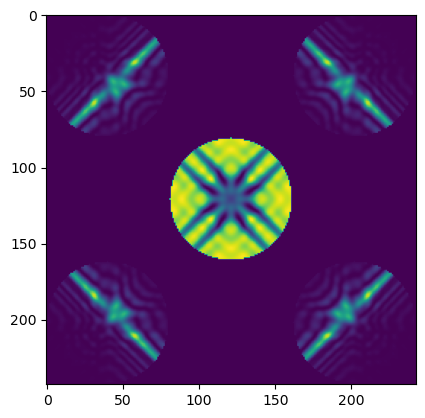

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

imgplot = plt.imshow(image)

### Notes

- Please find most recent version from here
    - <https://github.com/fengwang/electron_diffraction_simulation>
    
- Other versions (maybe out of date)
    - web: <https://fengwang.github.io/blogs/electron_diffraction_simulation/index.html>
    - notebook: <https://colab.research.google.com/drive/1Gt4sjrgKio53sYptBvJUOyuQ7I3rbVgJ?usp=sharing>
    - pdf: <https://github.com/fengwang/electron_diffraction_simulation/raw/main/ElectronDiffraction.pdf>
    
- Please submit your questions, suggestions and error reports to
    + <https://github.com/fengwang/electron_diffraction_simulation/issues>
    
- Last edit
    + Sun Jan 15 2023
    + <wang_feng@live.com>
